# Support Vector Machines: Strike Zones in Baseball
This project explores the support vector machine (SVM), by using it to predict whether a pitch is a ball or a strike based on its location over the plate. 

NOTE: This project is based on Codecadmey's [SVM Project](https://www.codecademy.com/journeys/data-scientist-ml/paths/dsmlcj-22-machine-learning-ii/tracks/dsmlcj-22-supervised-learning-ii-sv-ms-rm-nb/modules/support-vector-machines-skill-path-fe1996b3-8d55-4eb8-b35b-42b0110f2011-af506b18-77c9-4c9e-85eb-305bc37c29fd/projects/baseball). 

## Data
The data used is baseball statistics from `pybaseball`. 

## Set Up

In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from svm_visualization import draw_boundary

In [2]:
from pybaseball import playerid_lookup, statcast_batter

## Get Data
Player data for each of Aaron Judge, Jose Altuve, and David Ortiz will be extracted for 2 years within the years they were active. This is done with pybaseball's `statcast_batter()` (documentation found [here](https://github.com/jldbc/pybaseball/blob/master/docs/statcast_batter.md)). 

Each row in a dataframe corresponds with a single pitch that the player had in the given time period. 

In [3]:
# get data for each player in a dataframe
judge_data = statcast_batter(start_dt="2017-01-01", end_dt="2019-01-01", player_id=playerid_lookup('judge', 'aaron').loc[0, "key_mlbam"])

print(f"There are {len(judge_data)} observations.")
judge_data.head()

Gathering player lookup table. This may take a moment.
Gathering Player Data
There are 5797 observations.


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,FF,2018-10-09,92.2,-1.61,6.15,"Judge, Aaron",592450,519144,field_out,hit_into_play,...,NaN,1.08,0.74,0.74,NaN,NaN,NaN,NaN,NaN,NaN
1,SL,2018-10-09,85.7,-1.55,6.55,"Judge, Aaron",592450,519144,NaN,ball,...,NaN,2.35,-0.34,-0.34,NaN,NaN,NaN,NaN,NaN,NaN
2,FF,2018-10-09,90.9,-1.65,6.08,"Judge, Aaron",592450,519144,NaN,called_strike,...,NaN,1.44,0.87,0.87,NaN,NaN,NaN,NaN,NaN,NaN
3,SI,2018-10-09,89.4,-1.66,6.28,"Judge, Aaron",592450,519144,NaN,called_strike,...,NaN,1.91,1.40,1.40,NaN,NaN,NaN,NaN,NaN,NaN
4,FF,2018-10-09,96.6,-1.65,6.32,"Judge, Aaron",592450,598264,field_out,hit_into_play,...,NaN,0.98,0.78,0.78,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

altuve_data = statcast_batter('2017-01-01', '2019-01-01', 514888) # automatic lookup not functional, so player id was manually found

print(f"There are {len(altuve_data)} observations.")
altuve_data.head()

Gathering Player Data
There are 5076 observations.


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,CH,2018-10-18,87.1,3.31,5.73,"Altuve, Jose",514888,456034,strikeout,swinging_strike,...,NaN,2.64,1.31,-1.31,NaN,NaN,NaN,NaN,NaN,NaN
1,CH,2018-10-18,86.5,3.26,5.79,"Altuve, Jose",514888,456034,NaN,foul,...,NaN,2.74,1.26,-1.26,NaN,NaN,NaN,NaN,NaN,NaN
2,SI,2018-10-18,93.0,3.03,5.95,"Altuve, Jose",514888,456034,NaN,foul,...,NaN,1.58,1.33,-1.33,NaN,NaN,NaN,NaN,NaN,NaN
3,FF,2018-10-18,94.8,3.05,5.86,"Altuve, Jose",514888,456034,strikeout,swinging_strike,...,NaN,1.08,0.87,-0.87,NaN,NaN,NaN,NaN,NaN,NaN
4,FF,2018-10-18,93.2,3.31,5.72,"Altuve, Jose",514888,456034,NaN,foul,...,NaN,1.94,0.62,-0.62,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ortiz_data = statcast_batter('2008-01-01', '2010-01-01', playerid_lookup('ortiz', 'david').loc[0, "key_mlbam"])

print(f"There are {len(ortiz_data)} observations.")
ortiz_data.head()

Gathering Player Data
There are 5122 observations.


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,SL,2009-10-11,80.5,0.83,5.52,"Ortiz, David",120074,431148,field_out,hit_into_play,...,NaN,2.88,-0.20,-0.20,NaN,NaN,NaN,NaN,NaN,NaN
1,SI,2009-10-11,90.8,1.02,5.64,"Ortiz, David",120074,431148,NaN,called_strike,...,NaN,1.24,1.53,1.53,NaN,NaN,NaN,NaN,NaN,NaN
2,SL,2009-10-11,79.5,0.95,5.65,"Ortiz, David",120074,431148,field_out,hit_into_play,...,NaN,2.64,-0.11,-0.11,NaN,NaN,NaN,NaN,NaN,NaN
3,SI,2009-10-11,94.1,1.06,5.55,"Ortiz, David",120074,431148,field_out,hit_into_play,...,NaN,0.99,1.08,1.08,NaN,NaN,NaN,NaN,NaN,NaN
4,SI,2009-10-11,94.2,0.64,5.58,"Ortiz, David",120074,431148,NaN,foul,...,NaN,1.02,0.74,0.74,NaN,NaN,NaN,NaN,NaN,NaN


## Analyze Data
The datasets will be briefly explored to have information about the columns, observations, datatypes, unique values etc. 

In [6]:
# look at all columns
columns = judge_data.columns.to_list()
print(f"There are {len(columns)} features: ")
print(columns)

There are 118 features: 
['pitch_type', 'game_date', 'release_speed', 'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher', 'events', 'description', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des', 'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'woba_value', 'woba_denom', 'babip_value', 'is

In [7]:
# look at description column
print("description column: ", judge_data["description"].unique())

# look at type column
print("\n", "type column", judge_data["type"].unique())

description column:  ['hit_into_play' 'ball' 'called_strike' 'foul' 'swinging_strike'
 'blocked_ball' 'foul_tip' 'hit_by_pitch' 'swinging_strike_blocked'
 'automatic_ball']

 type column ['X' 'B' 'S']


The type column has the relevant data of whether the pitch was a strike (S), a ball (B), or neither. This would be the label for our SVM model, but the values should be mapped to a binary 0 or 1. 

In [8]:
# map type column to ints
judge_data["type"] = judge_data["type"].map({"S": 1, "B": 0})
print(judge_data["type"].head(20)) # verify that mapping worked

0     NaN
1     0.0
2     1.0
3     1.0
4     NaN
5     1.0
6     NaN
7     0.0
8     1.0
9     0.0
10    0.0
11    1.0
12    0.0
13    1.0
14    1.0
15    0.0
16    0.0
17    0.0
18    0.0
19    NaN
Name: type, dtype: float64


In [9]:
judge_data[["plate_x", "plate_z"]].head()

,plate_x,plate_z
0,-0.06,3.20
1,1.18,2.71
2,-0.98,2.18
3,-0.20,1.73
4,-0.55,2.72


The two columns above represent the pitch location relative to the plate, which will be used to predict if the pitch is a ball or a strike. 

## Data Preparation
The proper column(s) corresponding to the features and the labels will be saved. Any observations which are not relevant or are missing values will be excluded. 
The data will then be split into a training and validation set. 

In [10]:
# drop any rows which have NaN values in any of the given columns
judge_data = judge_data.dropna(subset=["plate_x", "plate_z", "type"])
judge_data[["plate_x", "plate_z", "type"]].head() # verify

,plate_x,plate_z,type
1,1.18,2.71,0.0
2,-0.98,2.18,1.0
3,-0.20,1.73,1.0
5,-0.88,4.11,1.0
7,0.60,1.13,0.0


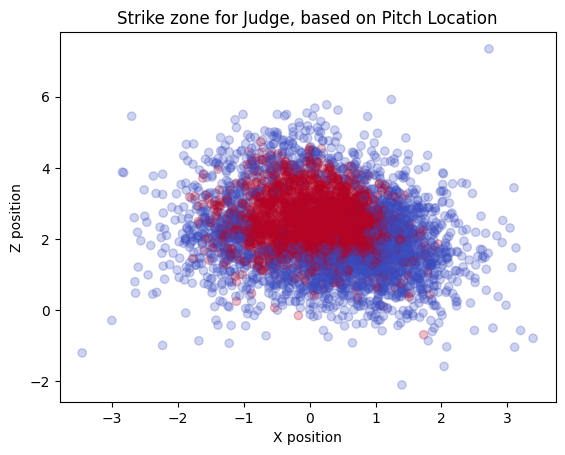

In [11]:
# visualize the strike zone
fig, ax = plt.subplots()
plt.scatter(x=judge_data.plate_x, y=judge_data.plate_z, c=judge_data.type, cmap=plt.cm.coolwarm, alpha=0.25)
plt.title("Strike zone for Judge, based on Pitch Location")
plt.xlabel("X position")
plt.ylabel("Z position")
plt.show()

In [12]:
# train-test split
training_set, validation_set = train_test_split(judge_data, random_state=1)

## Building the SVM
As the features and labels are ready, the SVM can be initialized, trained,and evaluated.

A parameter sweep for the gamma and C hyperparameters of the SVM will be done to find the best model. 

In [13]:
# create and train the classifier
classifier = SVC(kernel="rbf", gamma=100, C=100)
classifier.fit(training_set[["plate_x", "plate_z"]], training_set["type"])

# evaluate
print("The validation score is: ")
print(classifier.score(validation_set[["plate_x", "plate_z"]], validation_set["type"]))

The validation score is: 
0.785831960461285


c:\Users\Michelle\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


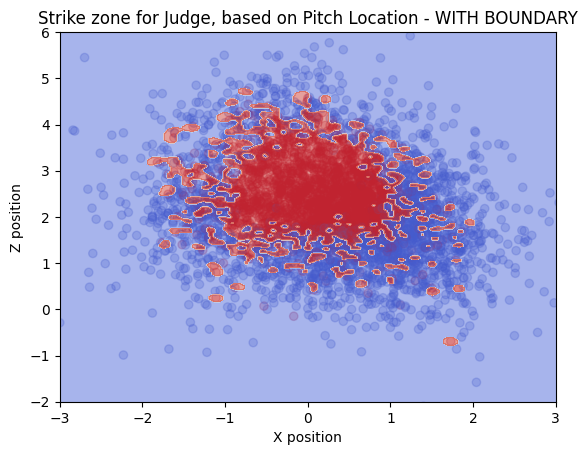

In [14]:
# plot the boundary
fig, ax = plt.subplots()
plt.scatter(x=judge_data.plate_x, y=judge_data.plate_z, c=judge_data.type, cmap=plt.cm.coolwarm, alpha=0.25)
plt.title("Strike zone for Judge, based on Pitch Location - WITH BOUNDARY")
plt.xlabel("X position")
plt.ylabel("Z position")

draw_boundary(ax, classifier)
ax.set_ylim(-2, 6)
ax.set_xlim(-3, 3)
plt.show()

### Optimizing the SVM
To determine the best model, the gamma and C hyperparameters will be optimized based on having the highest validation score. 

In [15]:
# possible values of gamma and C 
gammas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
Cs = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

# saving the best values
best_score = 0
best_gamma = 0
best_C = 0

# loop through each value and save the best model
for gamma in gammas:
   for C in Cs:
      classifier = SVC(kernel="rbf", gamma=gamma, C=C)
      classifier.fit(training_set[["plate_x", "plate_z"]], training_set["type"])
      score = classifier.score(validation_set[["plate_x", "plate_z"]], validation_set["type"])
      if score > best_score:
        best_score = score
        best_gamma = gamma
        best_C = C

# print results 
print(f"The best accuracy is {best_score}, based on gamma {best_gamma}, and C {best_C}.")

The best accuracy is 0.8542009884678748, based on gamma 10, and C 0.1.


## Looking at data from other players
In order to see the strike zone from other players, all the above will be put into 1 function, which can be called for any player. 

In [16]:
def get_strike_zone(player, feat_cols=["plate_x", "plate_z"]):
  '''
  Function which uses the given dataframe of player statistics (player), 
  and given list of feature names (feat_cols) to generate the strike zone
  using an SVM. Hyperparameter tuning of gamma and C for the SVM is done
  with a grid search. The final estimator, test score, and training score
  are printed. 

  If there are 2 features, the zone is plotted. 
  '''
  
  # get the labels (y) and features(X)
  player["type"] = player["type"].map({"S":1, "B":0})
  player = player.dropna(subset=feat_cols + ["type"]) # drop na values
  name = player.loc[1, "player_name"]

  y = player["type"]
  X = player[feat_cols]

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

  # possible values of gamma and C 
  gammas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
  Cs = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

  # saving the best values
  best_score = 0
  best_gamma = 0
  best_C = 0

  # loop through each value and save the best model
  for gamma in gammas:
    for C in Cs:
      classifier = SVC(kernel="rbf", gamma=gamma, C=C)
      classifier.fit(X_train, y_train)
      score = classifier.score(X_test, y_test)
      if score > best_score:
        best_score = score
        best_gamma = gamma
        best_C = C

  print(f"The best accuracy is {best_score}, based on gamma {best_gamma}, and C {best_C}.")

  # train final classifier
  classifier = SVC(kernel="rbf", gamma=best_gamma, C=best_C)
  classifier.fit(X_train, y_train)

  # plot the points and the SVM boundary ONLY if there are two features
  if len(feat_cols) == 2:
    fig, ax = plt.subplots()
    plt.scatter(x=player[feat_cols[0]], y=player[feat_cols[1]], c=player["type"], cmap=plt.cm.coolwarm, alpha=0.25)
    draw_boundary(ax, classifier)
    plt.xlabel(feat_cols[0])
    plt.ylabel(feat_cols[1])
    plt.title(f"Strike Zone for {name}, with SVM decision boundary")

    if feat_cols == ["plate_x", "plate_z"]:
      ax.set_ylim(-2, 6)
      ax.set_xlim(-3, 3)
    
    plt.show()
  else:
    print("As there are more than 2 given features, a 2D plot cannot be generated.")

Gathering Player Data
The best accuracy is 0.8542009884678748, based on gamma 10, and C 0.1.


c:\Users\Michelle\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


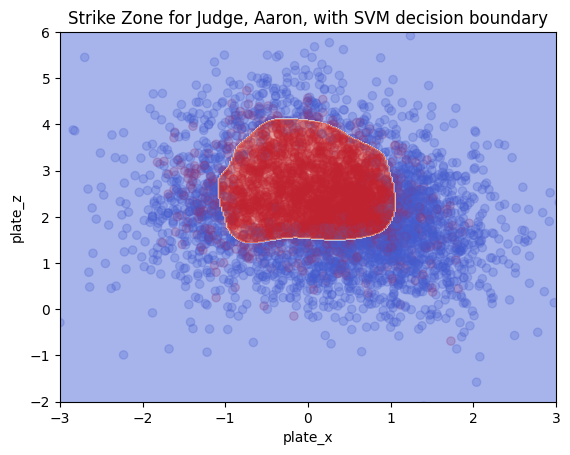

In [17]:
# reset judge data (as the dataframe was modified above)
judge_data = statcast_batter(start_dt="2017-01-01", end_dt="2019-01-01", player_id=playerid_lookup('judge', 'aaron').loc[0, "key_mlbam"])

# rerun judge data to verify correctness of function
get_strike_zone(judge_data)

Gathering Player Data
The best accuracy is 0.861198738170347, based on gamma 1, and C 5.


c:\Users\Michelle\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


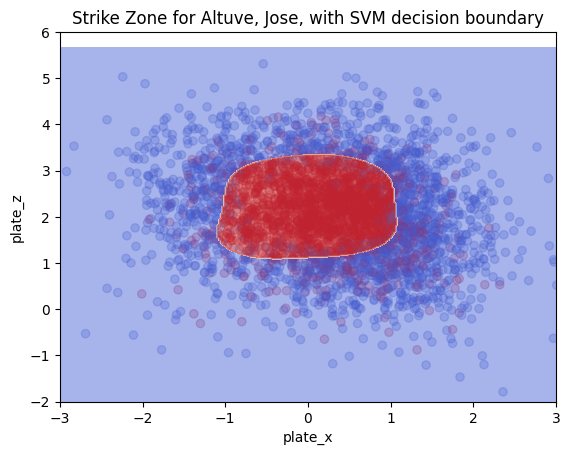

In [18]:
altuve_data = statcast_batter('2017-01-01', '2019-01-01', 514888)

get_strike_zone(altuve_data)

Gathering Player Data
The best accuracy is 0.8587174348697395, based on gamma 0.05, and C 50.


c:\Users\Michelle\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


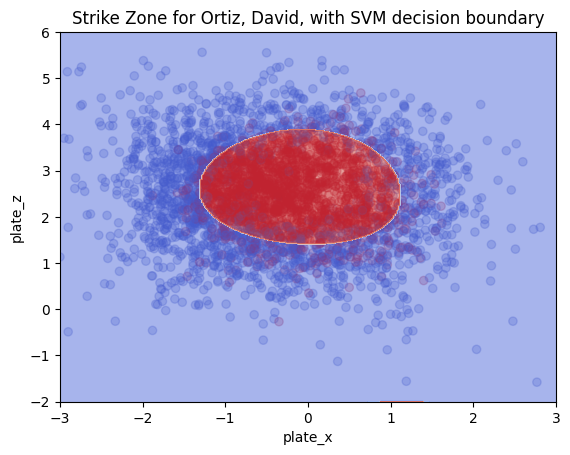

In [19]:
ortiz_data = statcast_batter('2008-01-01', '2010-01-01', playerid_lookup('ortiz', 'david').loc[0, "key_mlbam"])

get_strike_zone(ortiz_data)